In [ ]:
import random as rd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report

Import Dataset

In [ ]:
!gdown --id 17aM95b9gQKR2RbMxzOd1DVgyaL7C-qq3 

#upload file excel(csv) kendaraan_test

Downloading...
From: https://drive.google.com/uc?id=17aM95b9gQKR2RbMxzOd1DVgyaL7C-qq3
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 72.7MB/s]


In [ ]:
!gdown --id 1BRl5PcnsUTgjYolmnF7B7Jm5ezTSwpbA

#upload file excel(csv) kendaraan_train

Downloading...
From: https://drive.google.com/uc?id=1BRl5PcnsUTgjYolmnF7B7Jm5ezTSwpbA
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 65.3MB/s]


Kendaraan Test

In [ ]:
kendaraan_test = pd.read_csv('kendaraan_test.csv')

In [ ]:
kendaraan_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


Kendaraan Train

In [ ]:
kendaraan_train = pd.read_csv('kendaraan_train.csv')
kendaraan_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


Drop columns yang tidak di perlukan atau tidak digunakan pada dataset

In [ ]:
kendaraan_train.drop(['id', 'Kanal_Penjualan'], axis=1, inplace=True)

In [ ]:
kendaraan_test.drop(['Kanal_Penjualan'], axis=1, inplace=True)

In [ ]:
kendaraan_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,194.0,0


In [ ]:
kendaraan_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,229,0
...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,239,1


Cek dataset yang bernilai null

In [ ]:
kendaraan_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
kendaraan_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

Cek Outlier pada dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


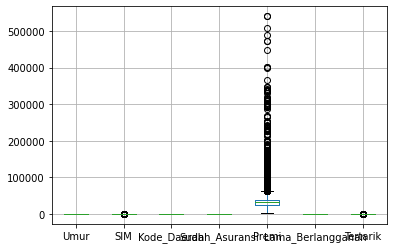

In [ ]:
kendaraan_train.boxplot()

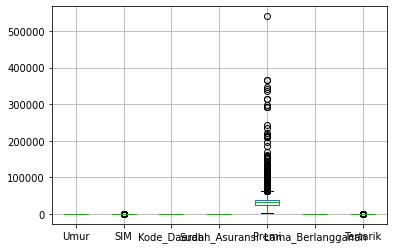

In [ ]:
kendaraan_test.boxplot()

Hapus Yang bernilai null

In [ ]:
kendaraan_train = kendaraan_train.dropna()
kendaraan_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

dataset kendaraan_test tidak di ubah atau di drop karena saat dilihat nilai valuenya sudah null semua

In [ ]:
kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180109 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      180109 non-null  object 
 1   Umur               180109 non-null  float64
 2   SIM                180109 non-null  float64
 3   Kode_Daerah        180109 non-null  float64
 4   Sudah_Asuransi     180109 non-null  float64
 5   Umur_Kendaraan     180109 non-null  object 
 6   Kendaraan_Rusak    180109 non-null  object 
 7   Premi              180109 non-null  float64
 8   Lama_Berlangganan  180109 non-null  float64
 9   Tertarik           180109 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 15.1+ MB


In [ ]:
kendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Lama_Berlangganan  47639 non-null  int64 
 9   Tertarik           47639 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.6+ MB


Encode Dataset
agar mudah dibandingkan

In [ ]:
encoder = LabelEncoder()

kendaraan_train['Jenis_Kelamin'] = encoder.fit_transform(kendaraan_train['Jenis_Kelamin'])
kendaraan_train['Umur_Kendaraan'] = encoder.fit_transform(kendaraan_train['Umur_Kendaraan'])
kendaraan_train['Kendaraan_Rusak'] = encoder.fit_transform(kendaraan_train['Kendaraan_Rusak'])

kendaraan_test['Jenis_Kelamin'] = encoder.fit_transform(kendaraan_test['Jenis_Kelamin'])
kendaraan_test['Umur_Kendaraan'] = encoder.fit_transform(kendaraan_test['Umur_Kendaraan'])
kendaraan_test['Kendaraan_Rusak'] = encoder.fit_transform(kendaraan_test['Kendaraan_Rusak'])


#normalisasi ConcatDataset

scaler = MinMaxScaler()

kendaraan_train[['Premi']] = scaler.fit_transform(kendaraan_train[['Premi']])
kendaraan_train[['Kode_Daerah']] = scaler.fit_transform(kendaraan_train[['Kode_Daerah']])

kendaraan_test[['Premi']] = scaler.fit_transform(kendaraan_test[['Premi']])
kendaraan_test[['Kode_Daerah']] = scaler.fit_transform(kendaraan_test[['Kode_Daerah']])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
kendaraan_train.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,0.634615,1.0,1,1,0.047251,97.0,0
1,0,48.0,1.0,0.750000,0.0,2,0,0.043104,158.0,0
3,1,58.0,1.0,0.923077,0.0,0,1,0.000000,63.0,0
5,0,21.0,1.0,0.673077,1.0,1,1,0.037402,171.0,0
8,1,20.0,1.0,0.153846,1.0,1,1,0.052380,31.0,0
10,0,25.0,1.0,0.269231,1.0,1,1,0.058753,282.0,0
14,0,66.0,1.0,0.461538,1.0,0,1,0.066946,281.0,0
15,0,31.0,1.0,0.153846,0.0,1,0,0.000000,132.0,0
16,1,24.0,1.0,0.576923,1.0,1,1,0.045867,215.0,0
17,1,22.0,1.0,0.288462,0.0,1,0,0.066338,225.0,0


In [ ]:
kendaraan_test.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1,49,1,0.153846,0,0,0,0.082475,145,0
1,0,22,1,0.903846,1,1,1,0.068822,241,0
2,0,24,1,0.538462,1,1,1,0.200636,62,0
3,0,46,1,0.153846,1,0,1,0.062575,34,0
4,0,35,1,0.442308,0,0,0,0.045268,229,0
5,0,26,1,0.538462,1,1,1,0.074583,198,0
6,1,24,1,0.538462,1,1,1,0.117520,160,0
7,1,40,1,0.538462,0,0,0,0.052743,79,0
8,0,23,1,0.288462,1,1,1,0.055317,219,0
9,1,43,1,0.538462,0,0,0,0.116737,41,1


Cek lagi Outlier pada dataset

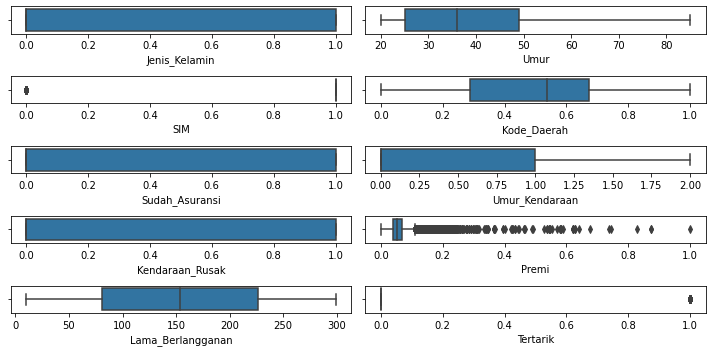

In [ ]:
fig, axs = plt.subplots(5,2, figsize = (10, 5))
plt1 = sns.boxplot(x = kendaraan_train['Jenis_Kelamin'], ax = axs[0,0])
plt2 = sns.boxplot(x = kendaraan_train['Umur'], ax = axs[0,1])
plt3 = sns.boxplot(x = kendaraan_train['SIM'], ax = axs[1,0])
plt4 = sns.boxplot(x = kendaraan_train['Kode_Daerah'], ax = axs[1,1])
plt5 = sns.boxplot(x = kendaraan_train['Sudah_Asuransi'], ax = axs[2,0])
plt6 = sns.boxplot(x = kendaraan_train['Umur_Kendaraan'], ax = axs[2,1])
plt7 = sns.boxplot(x = kendaraan_train['Kendaraan_Rusak'], ax = axs[3,0])
plt8 = sns.boxplot(x = kendaraan_train['Premi'], ax = axs[3,1])
plt9 = sns.boxplot(x = kendaraan_train['Lama_Berlangganan'], ax = axs[4,0])
plt10 = sns.boxplot(x = kendaraan_train['Tertarik'], ax = axs[4,1])

plt.tight_layout()

In [ ]:
def outliers(data, col):

    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    upper_bound = q3 + (iqr*1.5)
    lower_bound = q1 + (iqr*1.5)

    return iqr, upper_bound, lower_bound



In [ ]:
kendaraan_train

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,0.634615,1.0,1,1,0.047251,97.0,0
1,0,48.0,1.0,0.750000,0.0,2,0,0.043104,158.0,0
3,1,58.0,1.0,0.923077,0.0,0,1,0.000000,63.0,0
5,0,21.0,1.0,0.673077,1.0,1,1,0.037402,171.0,0
8,1,20.0,1.0,0.153846,1.0,1,1,0.052380,31.0,0
...,...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,0.076923,1.0,1,1,0.043454,217.0,0
285827,1,21.0,1.0,0.884615,1.0,1,1,0.078239,50.0,0
285828,1,23.0,1.0,0.961538,1.0,1,1,0.087661,226.0,0
285829,0,68.0,1.0,0.134615,1.0,0,1,0.051853,270.0,0


Seleksi Fitur

In [ ]:
#mengukur kekuatan dan arah hubungan linier dari dua variabel 

def corel(kendaraan_train, threshold):

    corr = kendaraan_train.corr().abs()
    keep = []
    for i in range(len(corr.iloc[:,0])):
        above = corr.iloc[:i,i]
        if len(keep) > 0: above = above[keep]
        if len(above[above < threshold]) == len(above):
            keep.append(corr.columns.values[i])

    return kendaraan_train[keep]

In [ ]:
feature_selection = corel(kendaraan_train, 0.5)
feature_selection

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,0.634615,1.0,0.047251,97.0,0
1,0,48.0,1.0,0.750000,0.0,0.043104,158.0,0
3,1,58.0,1.0,0.923077,0.0,0.000000,63.0,0
5,0,21.0,1.0,0.673077,1.0,0.037402,171.0,0
8,1,20.0,1.0,0.153846,1.0,0.052380,31.0,0
...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,0.076923,1.0,0.043454,217.0,0
285827,1,21.0,1.0,0.884615,1.0,0.078239,50.0,0
285828,1,23.0,1.0,0.961538,1.0,0.087661,226.0,0
285829,0,68.0,1.0,0.134615,1.0,0.051853,270.0,0


**PROSES CLASSIFICATON**

Pada pengujian classification ini kami melakukan nya dengan menggunakan dua jenis algoritma dari beberapa algoritma , classification ini bisa menggunakan algoritma KNN

In [ ]:
X = kendaraan_train.drop('Tertarik', axis=1).to_numpy()
y = kendaraan_train['Tertarik'].to_numpy()

In [ ]:
X_test = kendaraan_test.drop('Tertarik', axis=1).to_numpy()
y_test = kendaraan_test['Tertarik'].to_numpy()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X, y)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41778
           1       0.30      0.15      0.20      5861

    accuracy                           0.85     47639
   macro avg       0.60      0.55      0.56     47639
weighted avg       0.82      0.85      0.83     47639



In [ ]:
print("Test Accurasacy", model.score(X_test,y_test))

Test Accurasacy 0.8532924704548794


DF Train preprocessing and exploration

In [ ]:
kendaraan_train2 = pd.read_csv('kendaraan_train.csv').drop('id', axis=1)
kendaraan_test2 = pd.read_csv('kendaraan_test.csv')

In [ ]:
kendaraan_train2.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
kendaraan_train2.shape

(285831, 11)

In [ ]:
kendaraan_train2.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
kendaraan_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
 10  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 24.0+ MB


Formulasi Masalah Klasifikasi Pelanggan

In [ ]:
kendaraan_train2.isna().sum()
kendaraan_train2.dropna(inplace=True)
kendaraan_train2.shape

(171068, 11)

In [ ]:
kendaraan_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      171068 non-null  object 
 1   Umur               171068 non-null  float64
 2   SIM                171068 non-null  float64
 3   Kode_Daerah        171068 non-null  float64
 4   Sudah_Asuransi     171068 non-null  float64
 5   Umur_Kendaraan     171068 non-null  object 
 6   Kendaraan_Rusak    171068 non-null  object 
 7   Premi              171068 non-null  float64
 8   Kanal_Penjualan    171068 non-null  float64
 9   Lama_Berlangganan  171068 non-null  float64
 10  Tertarik           171068 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 15.7+ MB


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

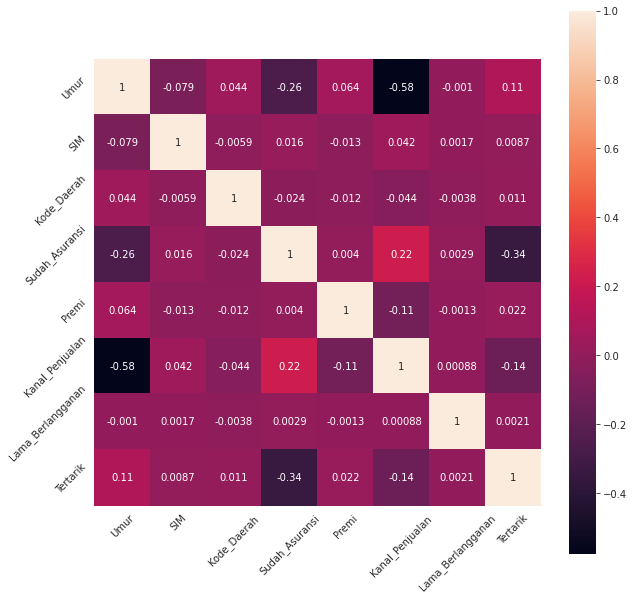

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))
sns.heatmap(kendaraan_train2.corr(), square=True, annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [ ]:
labelencoder = LabelEncoder()
kendaraan_train2['Umur_Kendaraan'] = labelencoder.fit_transform(kendaraan_train2['Umur_Kendaraan'])
kendaraan_train2['Jenis_Kelamin'] = labelencoder.fit_transform(kendaraan_train2['Jenis_Kelamin'])
kendaraan_train2['Kendaraan_Rusak'] = labelencoder.fit_transform(kendaraan_train2['Kendaraan_Rusak'])
kendaraan_train2

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,4.0,1.0,1,1,25988.0,152.0,217.0,0
285827,1,21.0,1.0,46.0,1.0,1,1,44686.0,152.0,50.0,0
285828,1,23.0,1.0,50.0,1.0,1,1,49751.0,152.0,226.0,0
285829,0,68.0,1.0,7.0,1.0,0,1,30503.0,124.0,270.0,0


In [ ]:
kendaraan_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      171068 non-null  int64  
 1   Umur               171068 non-null  float64
 2   SIM                171068 non-null  float64
 3   Kode_Daerah        171068 non-null  float64
 4   Sudah_Asuransi     171068 non-null  float64
 5   Umur_Kendaraan     171068 non-null  int64  
 6   Kendaraan_Rusak    171068 non-null  int64  
 7   Premi              171068 non-null  float64
 8   Kanal_Penjualan    171068 non-null  float64
 9   Lama_Berlangganan  171068 non-null  float64
 10  Tertarik           171068 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 15.7 MB


DF Test Eksplorasi dan Preprocessing

In [ ]:
kendaraan_test2.isna().sum()
kendaraan_test2.dropna(inplace=True)
kendaraan_test2.shape

(47639, 11)

In [ ]:
kendaraan_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.4+ MB


In [ ]:
kendaraan_test2['Umur_Kendaraan'] = labelencoder.fit_transform(kendaraan_test2['Umur_Kendaraan'])
kendaraan_test2['Jenis_Kelamin'] = labelencoder.fit_transform(kendaraan_test2['Jenis_Kelamin'])
kendaraan_test2['Kendaraan_Rusak'] = labelencoder.fit_transform(kendaraan_test2['Kendaraan_Rusak'])
kendaraan_test2

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,0,0,46963,26,145,0
1,0,22,1,47,1,1,1,39624,152,241,0
2,0,24,1,28,1,1,1,110479,152,62,0
3,0,46,1,8,1,0,1,36266,124,34,0
4,0,35,1,23,0,0,0,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61,1,46,0,2,0,31039,124,67,0
47635,0,41,1,15,0,0,0,2630,157,232,0
47636,0,24,1,29,1,1,1,33101,152,211,0
47637,0,59,1,30,0,0,0,37788,26,239,1


Split Data

In [ ]:
X2 = kendaraan_train2.drop('Tertarik', axis = 1).to_numpy()
y2 = kendaraan_train2['Tertarik'].to_numpy()

In [ ]:
x_test2 = kendaraan_test2.drop('Tertarik', axis=1).to_numpy()
y_test2 = kendaraan_test2['Tertarik'].to_numpy()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100
max_depth = None

model2 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
model2.fit(X2,y2)

y_pred2 = model2.predict(x_test2)
report2 = classification_report(y_test2, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41778
           1       0.37      0.12      0.18      5861

    accuracy                           0.87     47639
   macro avg       0.63      0.54      0.55     47639
weighted avg       0.82      0.87      0.84     47639



In [ ]:
print("Test Accuracy", model2.score(x_test2,y_test2) )

Test Accuracy 0.866726841453431
